In [33]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# machine learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [36]:
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/train_data_imputed.csv'
dataset = pd.read_csv(dataset_url, index_col=0)

In [37]:
features =list(dataset.columns)
features.remove('mortstat')
target= ['mortstat']

X = dataset[features]
y = dataset[target]

# Spliting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=10, random_state=0))
])

In [43]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 0.3733611973568983


In [44]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [45]:
results = {}
for i in range(1,9):
    results[10*i] = get_score(10*i)

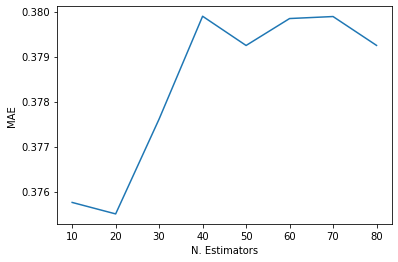

In [53]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("N. Estimators")
plt.ylabel("MAE")
plt.show()

In [47]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

20

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, y_train)
accuracy_score(y_val, Y_pred)

0.7610062893081762